In [1]:
# import the tools we need

# Regular EDA(explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make plots appear inside the notebook
# %matplotlib inline 

#import models form sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

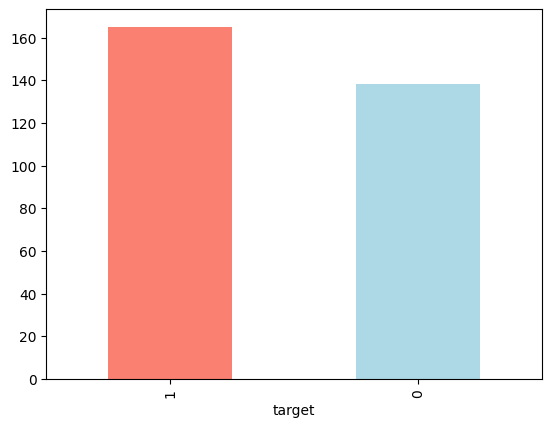

In [6]:
df["target"].value_counts().plot(kind ="bar",color = ("Salmon","lightblue")); 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# to check for the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


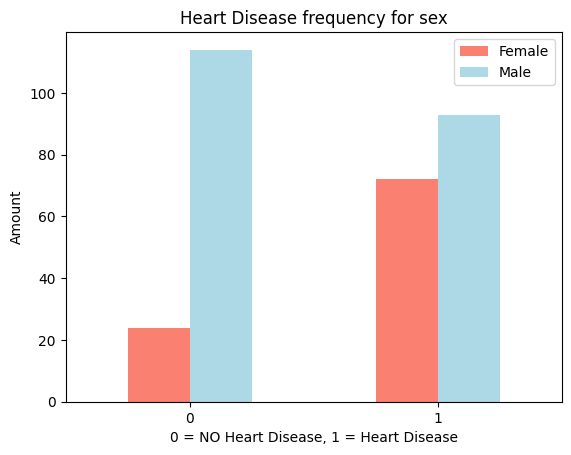

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", color=("salmon","lightblue"));
plt.title("Heart Disease frequency for sex");
plt.xlabel("0 = NO Heart Disease, 1 = Heart Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

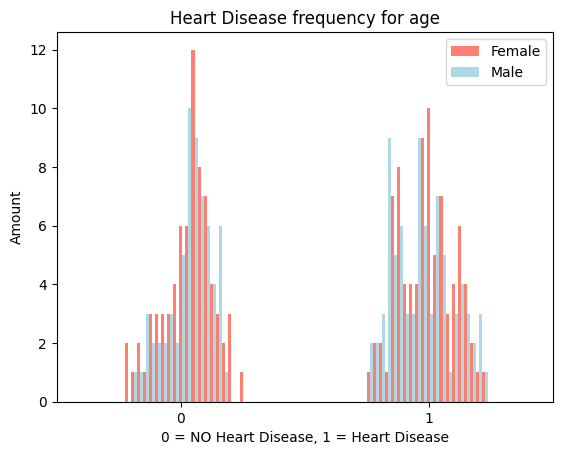

In [13]:
pd.crosstab(df.target, df.age).plot(kind = "bar", color=("salmon","lightblue"));
plt.title("Heart Disease frequency for age");
plt.xlabel("0 = NO Heart Disease, 1 = Heart Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

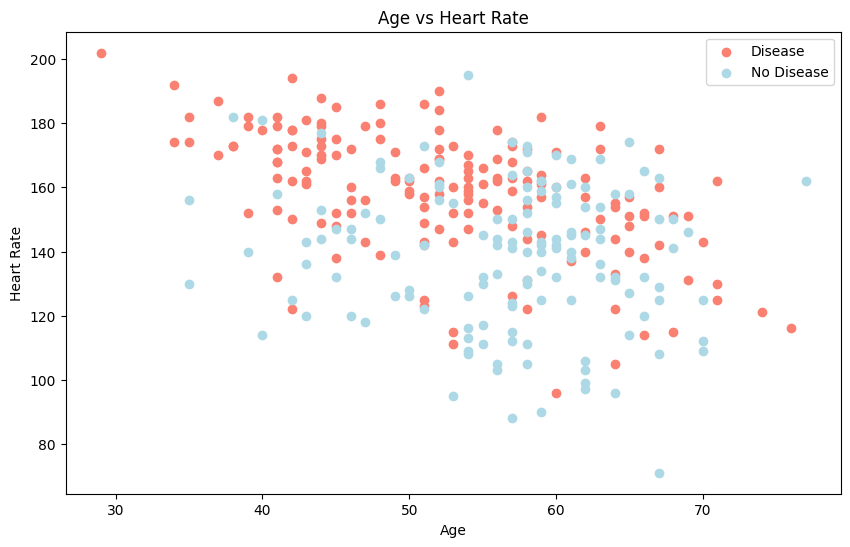

In [14]:
plt.figure(figsize = (10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="salmon");
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="lightblue");

plt.title("Age vs Heart Rate");
plt.xlabel("Age");
plt.ylabel("Heart Rate");
plt.legend(["Disease","No Disease"]);

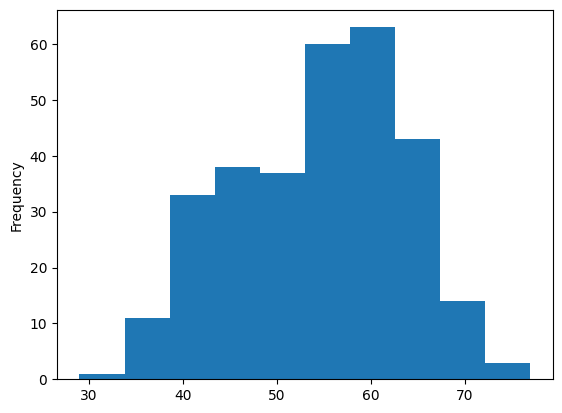

In [15]:
df.age.plot.hist();

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


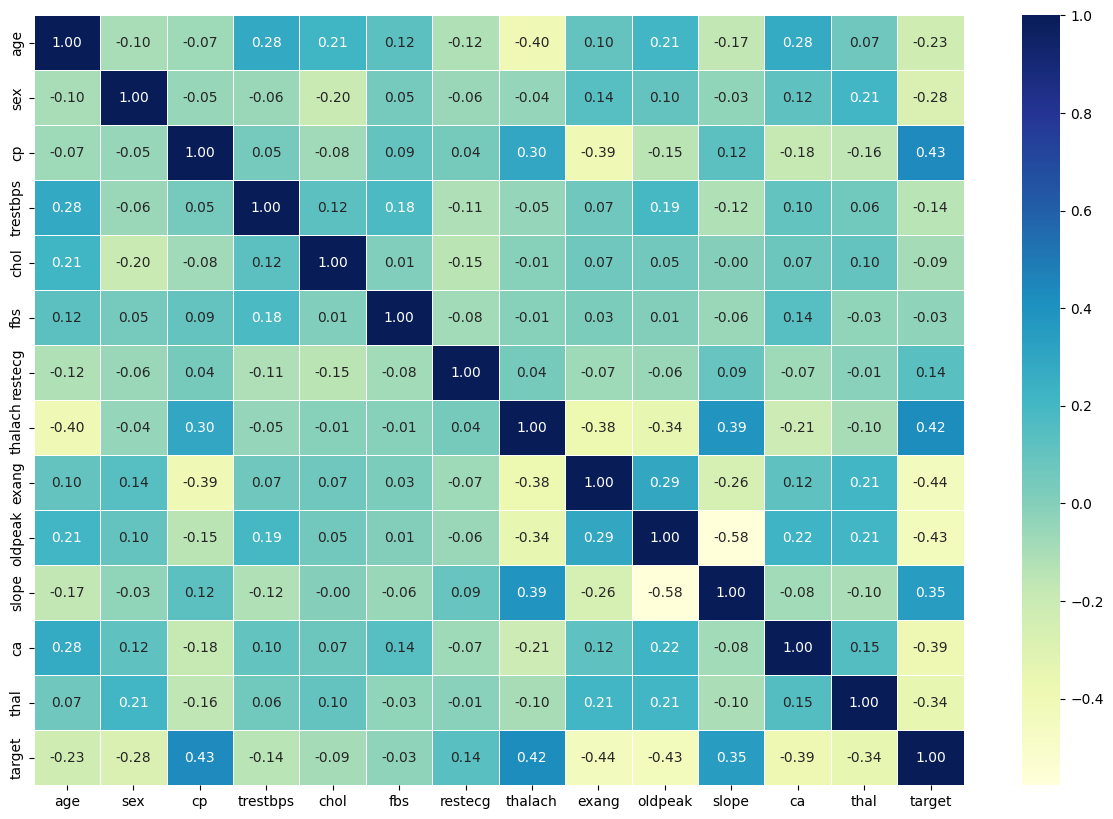

In [18]:
corr_mertix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mertix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# bottom,top=ax.get_ylim()
# ax.set-ylim()

# preparing Our data for Machine Learning

In [19]:
np.random.seed(42)

In [20]:
x = df.drop("target", axis = 1)
y = df["target"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2)

In [22]:
x_train.shape

(242, 13)

In [23]:
x_test.shape

(61, 13)

In [24]:
y_train.shape

(242,)

In [25]:
y_test.shape

(61,)

In [26]:
models = {"Logistic Regressor " : LogisticRegression(),
         "KNN " : KNeighborsClassifier(),
         "Randoem Forest" : RandomForestClassifier()}

# Creating a function to fit and scroe the model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # Make a dictionary to store the model scores
    model_scores={}
    # 
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and store it to the model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
    
model_scores = fit_and_score(models,
                             x_train,
                             x_test,
                             y_train,
                             y_test)

model_scores

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regressor ': 0.8852459016393442,
 'KNN ': 0.6885245901639344,
 'Randoem Forest': 0.8360655737704918}

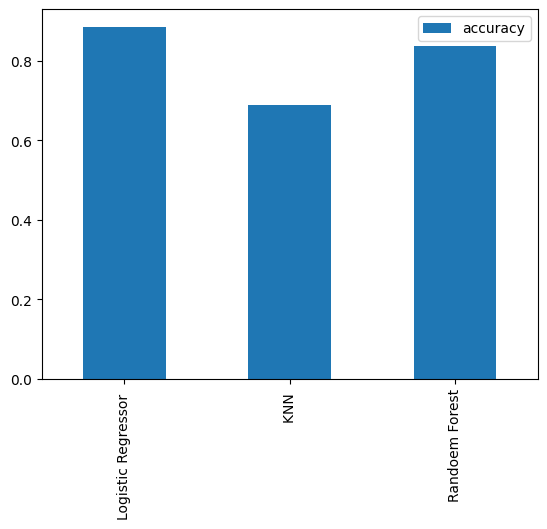

In [27]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [28]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]} 

# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [29]:
#  tune LogisticRegression

np.random.seed(42)

# setup Random hyperparameter search for the LogisticRegressor

log_reg_grid = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

In [30]:
# Fit the LogisticRegression Model
log_reg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
log_reg_grid.score(x_test,y_test)

0.8852459016393442

In [32]:
# Set up random seed
np.random.seed(42)

# set up Random Hyperparameter for the RandomForestClassifier

rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

In [33]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rf_grid.score(x_test,y_test)

0.8688524590163934

In [35]:
rf_grid.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

In [37]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [40]:
y_preds = gs_log_reg.predict(x_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

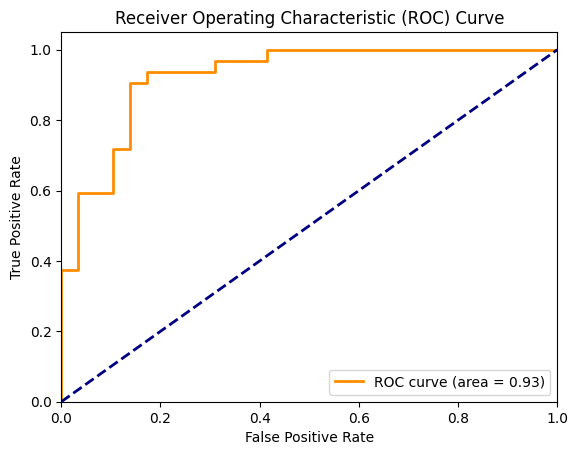

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your model gs_log_reg and have x_test, y_test

# Get the predicted probabilities for the positive class
y_probs = gs_log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [45]:
# Confusion Matrix using seadorn
sns

<module 'seaborn' from '/opt/anaconda3/envs/env/lib/python3.12/site-packages/seaborn/__init__.py'>

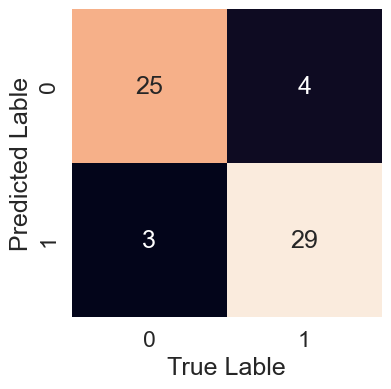

In [46]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test,y_preds):
    """
    plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Lable")
    plt.ylabel("Predicted Lable")
    bottom,top = ax.get_ylim()
    # ax.set_ylim(bottom+0.5,top-0.5)

plot_conf_matrix(y_test,y_preds)

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.52%


In [50]:
# Creating a hyperparameter grid for RandomForestClassifier
rf_param_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [51]:
# Set random seed for reproducibility
np.random.seed(42)

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    cv=10,
    n_iter=100,
    verbose=1,
    return_train_score=True
)

In [52]:
rf_random_search.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   return_train_score=True, verbose=1)

In [53]:
y_preds_1 = rf_random_search.predict(x_test)

In [54]:
y_preds_1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [55]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
accuracy = accuracy_score(y_test, y_preds_1)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.89%


In [73]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500,1000],  # Number of trees
    'max_depth': [10, 20, 30, 40, 50, None],    # Maximum depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt'],           # Number of features to consider when splitting
    'bootstrap': [True, False]                  # Whether to use bootstrap sampling
}

In [74]:
param_grid = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=param_grid,
                               n_iter=100,
                               cv=10,
                               verbose=2,
                               n_jobs=1,
                               random_state=42)

In [75]:
param_grid.fit(x_test, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000]},
                   random_state=42, verbose=2)

In [76]:
param_grid.score(x_test, y_test)

0.9016393442622951

In [77]:
y_preds_2 = param_grid.predict(x_test)

In [78]:
print(classification_report(y_test,y_preds_2))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [79]:
accuracy = accuracy_score(y_test, y_preds_2)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.16%


In [93]:
import pickle

In [95]:
# Save the model to a pickle file
with open('Heart_model.pkl', 'wb') as f:
    pickle.dump(param_grid.best_estimator_, f) 

In [97]:
# Load the model from the pickle file
with open('Heart_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [98]:
y_preds_loaded = loaded_model.predict(x_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_preds_loaded))

Accuracy of loaded model: 0.9016393442622951
